In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

from IPython.display import IFrame, display

/Users/Taylor/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
filename = "data/Mother Jones' Investigation_ US Mass Shootings, 1982-2018 - US mass shootings.csv"

In [66]:
df = pd.read_csv(filename)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
case                                   99 non-null object
location                               99 non-null object
date                                   99 non-null object
year                                   99 non-null int64
summary                                99 non-null object
Fatalities                             99 non-null int64
Injured                                99 non-null int64
total_victims                          99 non-null object
Venue                                  99 non-null object
Prior signs of mental health issues    99 non-null object
Mental health - details                98 non-null object
Weapons obtained legally               99 non-null object
Where obtained                         98 non-null object
Type of weapons                        99 non-null object
Weapon details                         99 non-null object
Race                          

In [128]:
# What's up with total_victims not being numeric?? That would be useful
df.total_victims.unique()

array(['8', '3', '31', '5', '15', '46', '6', '604',
       '11 (dozens more were reportedly injured in the panic)', '16',
       '102', '17', '35', '12', '18', '7', '10', '4', '19', '20', '9',
       '29', '82', '11', '43', '26', '13', '55', '22', '37', '28', '25',
       '14', '44', '21', '41'], dtype=object)

In [130]:
# Ugh someone threw a string in there. Ok well....
df['casualties'] = df.Injured + df.Fatalities
df.casualties.dtype

dtype('int64')

In [4]:
df.head()

,case,location,date,year,summary,Fatalities,Injured,total_victims,Venue,Prior signs of mental health issues,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Waffle House shooting,"Nashville, TN",4/22/18,2018,"Travis Reinking, 29, opened fire around 3:30 a...",4,4,8,Other,Yes,...,Family member,semiautomatic rifle,AR-15,White,M,https://www.washingtonpost.com/news/post-natio...,https://www.buzzfeed.com/briannasacks/this-is-...,36.052521,-86.616944,Mass
1,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,...,TBD,semiautomatic rifle; shotgun,-,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.392496,-122.366528,Mass
2,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,...,A Florida pawn shop,semiautomatic rifle,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,26.304830,-80.269511,Mass
3,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,...,TBD,semiautomatic rifle and semiautomatic handgun,-,White,M,http://www.wpxi.com/news/top-stories/family-me...,-,40.052151,-79.389166,Mass
4,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,...,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,-,40.018759,-122.393089,Spree


In [91]:
# most recent story
most_recent = df.iloc[[0]]
urls = most_recent['Sources'][0].split(';')
IFrame(urls[0], width=850, height=450)

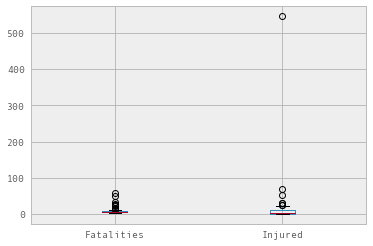

In [6]:
# numerical columns are just ['year','Fatalities','Injured','latitude','longitude']
# doesn't give much to work with in terms of correlation but categorical comparisons can be done
df[['Fatalities','Injured']].boxplot()
plt.show()

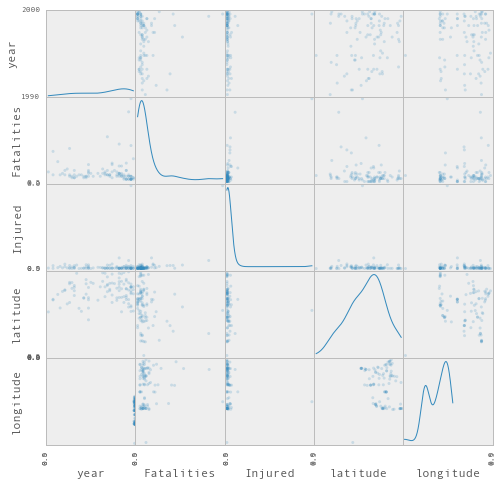

In [7]:
# not the most useful plot but I wanna try it
def plot_scatter_matrix(df):    
    """
    Make scatterplot matrix to compare multiple features together

    Parameters:
    -----------
    df: a Dataframe to use
    """
#     plt.figure(figsize=(8,8))
    axs = pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='kde')

    for ax in axs[:,0]: # the left boundary
        ax.grid('off', axis='both')
        ax.set_yticks([0, .5])

    for ax in axs[-1,:]: # the lower boundary
        ax.grid('off', axis='both')
        ax.set_xticks([0, .5])

    figure = plt.gcf()
    figure.set_size_inches(8,8)
    plt.show()
    
plot_scatter_matrix(df)

In [25]:
import mapboxgl as mbgl
import pysal.esda.mapclassify as mapclassify

from mapboxgl.viz import * 

data_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/points.csv'
test_df = pd.read_csv(data_url)

# Must be a public token, starting with `pk`
token = 'pk.eyJ1IjoidHI1IiwiYSI6ImNqZ2cwMm54czA4eDcycXFtdHA1eWNsaW0ifQ.GBCT-wNb5xVec_dtyoWipQ'

# Create a geojson file export from a Pandas dataframe
# mbgl.utils.df_to_geojson(test_df, filename='test.geojson',
#               properties=['Avg Medicare Payments', 'Avg Covered Charges', 'date'],
#               lat='lat', lon='lon', precision=3)

# data = test_df
# main_prop = "Avg Covered Charges"
# second_prop = "Avg Medicare Payments"

In [131]:
# Create a geojson file export from a Pandas dataframe
mbgl.utils.df_to_geojson(df, filename='points.geojson',
              properties=['case','Fatalities','Injured','date','year'],
              lat='latitude', lon='longitude', precision=3)


data = df
main_prop = 'Fatalities'
second_prop = 'casualties'


# Generate data breaks and color stops from colorBrewer
color_breaks = mapclassify.Natural_Breaks(data[main_prop], k=8, initial=0).bins
color_stops =  mbgl.utils.create_color_stops(color_breaks, colors='YlOrRd') #colors='Spectral'

# Generate radius breaks from data domain and circle-radius range
radius_breaks = mapclassify.Natural_Breaks(data[second_prop], k=8, initial=0).bins
radius_stops =  mbgl.utils.create_radius_stops(radius_breaks, 1, 10)

center_us = (-95, 40)

viz = GraduatedCircleViz('points.geojson', 
                  access_token=token,
                  color_property = main_prop,
                  color_stops = color_stops,
                  radius_property = second_prop,
                  radius_stops = radius_stops,
                  center = center_us,
                  opacity= 0.9,
                  zoom = 3,
                  style='mapbox://styles/mapbox/dark-v9?optimize=true',
                  below_layer = 'waterway-label')
viz.show()

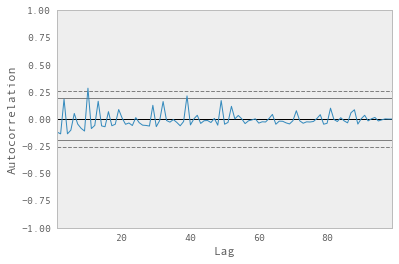

In [38]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(df['Fatalities'])
plt.show()

## Years

In [47]:
df.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2001, 2000, 1999, 1998, 1997, 1996,
       1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1984,
       1982])

Looks like 2002 and 1985 are missing

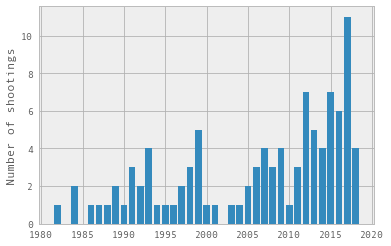

In [85]:
casualty_cols = ['Fatalities','Injured']
# 'latitude','longitude']
year_counts = df.groupby('year')['date'].count() # date is arbitrary
plt.bar(year_counts.index, year_counts)
plt.ylabel('Number of shootings')
plt.show()

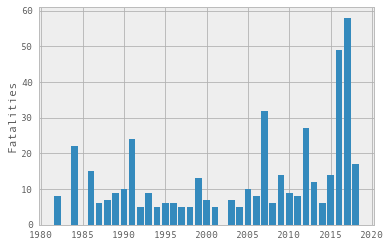

In [83]:
# df.sort_values(by='year', ascending=False).plot.bar('year','Fatalities')
# plt.xlim([2010,2018])
plt.bar(df.year, df.Fatalities)
plt.ylabel('Fatalities')
plt.show()

In [117]:
import statename_abv as state_names

name_map = state_names.statename_to_abbr # name to state code map

def extract_state(location):
    state = location.split(',')[1].strip()
    return name_map.get(state, state)
    
df['state'] = df.location.map(extract_state)

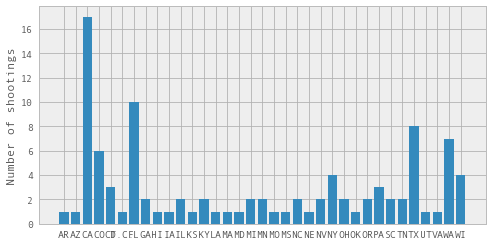

In [123]:
state_counts = df.groupby('state')['date'].count() # date is arbitrary

plt.figure(figsize=(8,4))
plt.bar(state_counts.index, state_counts)
plt.ylabel('Number of shootings')
plt.show()

Other ideas:
* Are shootings increasing? Lin-reg? Chi squared test of shootings freq, recent years vs older years?
